In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 



In [2]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

In [3]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

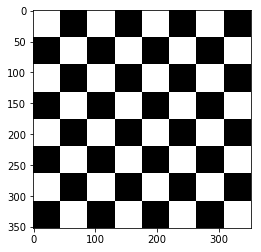

In [5]:
plt.imshow(gray_flat_chess, cmap='gray')

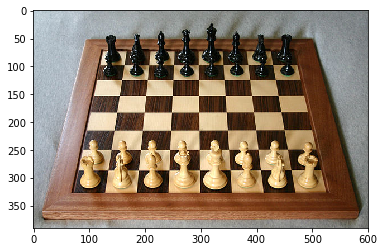

In [7]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

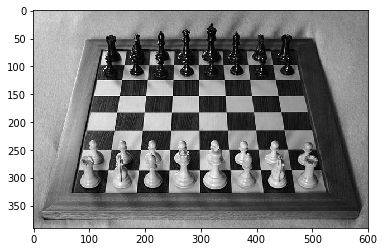

In [8]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess, cmap='gray')

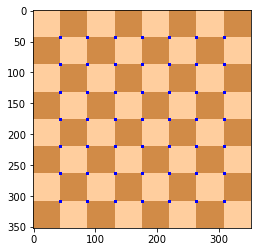

In [9]:
gray_flat_chess = np.float32(gray_flat_chess)
dst = cv2.cornerHarris(src=gray_flat_chess, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
flat_chess[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(flat_chess)

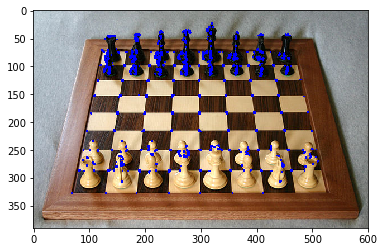

In [10]:
gray = np.float32(gray_real_chess)

dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
real_chess[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(real_chess)

## Shi-Tomasi

In [11]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 5, 0.01, 10)

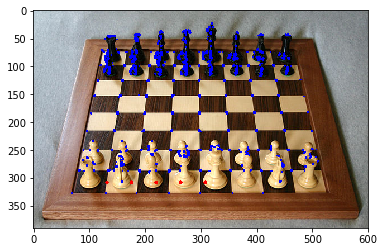

In [13]:
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255,0,0), -1)
plt.imshow(real_chess)